<a href="https://colab.research.google.com/github/shemaaali/DS-Unit-1-Sprint-2-Statistics/blob/master/Confidence_Intervals/S_A_7__LS_DS18_123_Confidence_Intervals_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Confidence Intervals

The following url can be used to access an abbreviated version of responses to Stack Overflow's 2018 Developer Survey. The original Survey had ~100k respondents but the data is quite dirty so I have selected a cleaner subset of it for you to use for your assignment.

<https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv>

The provided dataset holds 14 columns of information about individuals who make less than 500k per year and who responded that they had: 

"Participated in a full-time developer training program or bootcamp"

## Part 1 - Setting the Stage

**1) Load the dataset**

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [113]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv')
print(df.shape)
df.head()

(2761, 15)


,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
0,62,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data scientist or machine l...,12-14 years,6-8 years,120000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C;F#;Haskell;Python;Scala,Male,25 - 34 years old,White or of European descent
1,73,No,Employed full-time,"A humanities discipline (ex. literature, histo...",Back-end developer;Full-stack developer;System...,0-2 years,0-2 years,36000.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Four to six months,Java;JavaScript;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,White or of European descent
2,127,"Yes, full-time",Employed full-time,"A business discipline (ex. accounting, finance...",Full-stack developer,3-5 years,3-5 years,59980.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C#;JavaScript;TypeScript;HTML;CSS,Male,25 - 34 years old,East Asian
3,140,No,Employed full-time,"A social science (ex. anthropology, psychology...",Data scientist or machine learning specialist;...,9-11 years,3-5 years,70000.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Tapping ...,I haven’t gotten a developer job,JavaScript;Python;SQL;VBA,Male,25 - 34 years old,White or of European descent
4,153,No,Employed full-time,"Computer science, computer engineering, or sof...",Mobile developer,6-8 years,3-5 years,105000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C;Java;JavaScript;Objective-C;PHP;Python;Ruby;...,Male,25 - 34 years old,White or of European descent


**2) Select two random samples from this dataset, one with a sample size of 20 and the other with a sample size of 200. (Use a `random_state` of `42` when selecting the samples)**

In [114]:
sample1 = df.sample(20, random_state=42)

sample2 = df.sample(200, random_state=42)

**3) Calculate and report the sample means of the `ConvertedSalary` column for both of the samples.**

In [115]:
sample1['ConvertedSalary'].mean()

55752.2

In [116]:
sample2['ConvertedSalary'].mean()

68551.255

**4) Both of these sample means are estimates of an underlying population value. Which sample mean do you trust more? Why? Would a non-technical audience have any idea about which of these values is more trustworthy?**

**Sample1**

Because, If we do not know the population of individual values is normal, then we must have a large sample size (more than 30). Because we assume that the distribution of individual is normal in this example, a normal model is also a good fit for the distribution of sample means.

In another word, the absence of any other information, the sample mean that one observes is the "best estimate" of the value of the population mean. - If we took the mean of all possible sample means, this mean would equal the true population mean. This property of the mean is what makes it an unbiased estimator of the population mean.

**5) Does just the point estimate (individual value of the sample mean) indicate to you anything about how much sampling error there could be with these estimates?**

Yes, it does. Point estimates another way to say that is the best point estimate of the true value of μ. Some error is associated with this estimate, however—the true population mean may be larger or smaller than the sample mean. Instead of a point estimate, you might want to identify a range of possible values p might take.

**6) What strategies could we use when reporting these numbers to not only report our estimates but also to give non-technical readers an idea about how far off our estimates might be due to sampling error?**



The importance and value for a company to define, understand and execute on the right Data & Reporting Strategy specific to their needs is immeasurable. Many businesses stumble their way through collecting, storing and gaining insights from data, more often than not missing the target.

One of the more common mistakes made by companies engaging on the data and reporting strategy journey is taking a top down approach. Making technology and process choices based on assumption, rather than necessity or requirement.

## Part 2 - Reporting CIs / MOEs along with our point estimates for more context.

**1) Calculate and report a 95% confidence interval around both of the sample means from part 1.**



In [117]:
from scipy import stats

def confidence_interval(data, confidence=.95):
  # Make sure we're working with a numpy array
  sample = np.array(data)
  # Sample Mean
  x_bar = sample.mean()
  # Sample Standard Deviation
  s = np.std(sample, ddof=1)
  # Sample Size
  n = len(sample)
  # T statistic - correspond to our confidence level, and our degrees of freedom
  t = stats.t.ppf((1+confidence) / 2, n-1)
  # Standard Error
  std_err = s / np.sqrt(n)
  # Margin of Error
  moe = std_err * t
  # Lower and Upper Bound
  upper = x_bar + moe
  lower = x_bar - moe

  return (lower, x_bar, upper)

In [118]:
# random sample of size 20
# with 95% confidence, the true population value is within
# the upper and lower bounds of the Confidence Interval
sample1 = df.sample(20, random_state=42)

confidence_interval(sample1['ConvertedSalary'])

(35805.10309625536, 55752.2, 75699.29690374463)

In [119]:
confidence = .95

(1+confidence) / 2

0.975

In [120]:
def confidence_interval(data, confidence=.95):
  # Make sure we're working with a numpy array
  sample = pd.Series(data)
  # Sample Mean
  x_bar = sample.mean()
  # Sample Standard Deviation
  s = sample.std()
  # Sample Size
  n = len(sample)
  # T statistic - correspond to our confidence level, and our degrees of freedom
  t = stats.t.ppf((1+confidence) / 2, n-1)
  # Standard Error
  std_err = s / np.sqrt(n)
  # Margin of Error
  moe = std_err * t
  # Lower and Upper Bound
  upper = x_bar + moe
  lower = x_bar - moe

  return (lower, x_bar, upper)

In [121]:
# random sample of size 200
# with 95% confidence, the true population value is within
# the upper and lower bounds of the Confidence Interval
sample2 = df.sample(200, random_state=42)

confidence_interval(sample2['ConvertedSalary'])

(60593.058804479086, 68551.255, 76509.45119552092)

In [122]:
confidence = .95

(1+confidence) / 2

0.975

In [123]:
# Confidence Interval with sample size of 20
CI1 = confidence_interval(sample1['ConvertedSalary'])
CI1

(35805.10309625536, 55752.2, 75699.29690374463)

In [124]:
# Confidence Interval with sample size of 200
CI2 = confidence_interval(sample2['ConvertedSalary'])
CI2

(60593.058804479086, 68551.255, 76509.45119552092)

**2) Which confidence interval is wider and why?**

The confidence interval of the first sample is much wider. Due to its lower sample size the standard error of our estimate is much larger causing the potential distribution of sample means to be much more spread out. A confidence interval catches 95% of this theoretical distriution of sample means so if our standard error is larger, our confidence interval will be wider as well.

**3) Report the mean and the margin of error for both of the sample means. What does the Margin of Error Represent?**

In [125]:
print("ConvertedSalary Estimate 1")
print("Mean:", CI1[1])
print("MOE:", CI1[2]-CI1[1])

ConvertedSalary Estimate 1
Mean: 55752.2
MOE: 19947.096903744634


In [126]:
print("ConvertedSalary Estimate 1")
print("Mean:", CI2[1])
print("MOE:", CI2[2]-CI2[1])

ConvertedSalary Estimate 1
Mean: 68551.255
MOE: 7958.196195520912


The margin of error gives an idea of how far off our estimates might be (with 95% confidence). We're trying to supply a plausible range for our parameter of interest (the true average salary of bootcamp grads).

## Part 3 - Communicate the Precision of Sample Estimates Graphically

**1) Create a plot using `plt.errorbar` that compares both of the confidence intervals.** 

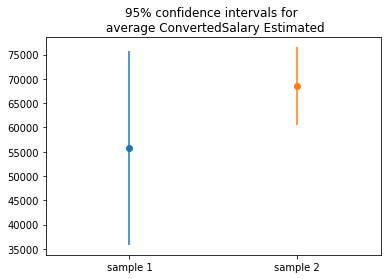

In [127]:
# plt.errorbar
plt.errorbar(x=0, y=CI1[1], yerr=(CI1[2]-CI1[1]), fmt='o')
plt.errorbar(x=1, y=CI2[1], yerr=(CI2[2]-CI2[1]), fmt='o')
plt.title('95% confidence intervals for \n average ConvertedSalary Estimated')
plt.xticks(ticks=[0,1], labels=['sample 1', 'sample 2'])
plt.xlim(-.5, 1.5)
plt.show()

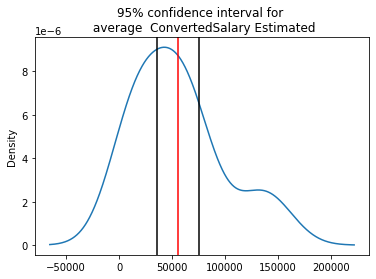

In [128]:
# plt.density
sample1['ConvertedSalary'].plot.density()
plt.axvline(CI1[0], color='black')
plt.axvline(CI1[1], color='red')
plt.axvline(CI1[2], color='black')
plt.title('95% confidence interval for \n average  ConvertedSalary Estimated')
plt.show()

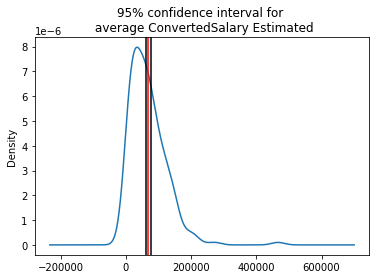

In [130]:
# plt.density
sample2['ConvertedSalary'].plot.density()
plt.axvline(CI2[0], color='black')
plt.axvline(CI2[1], color='red')
plt.axvline(CI2[2], color='black')
plt.title('95% confidence interval for \n average ConvertedSalary Estimated')
plt.show()

**2) Create a plot using `plt.bar` that compares both of the confidence intervals.**

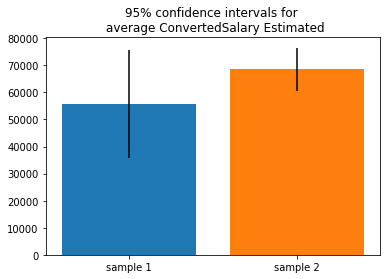

In [131]:
# plt.bar
plt.bar(x=0, height=CI1[1], yerr=(CI1[2]-CI1[1]))
plt.bar(x=1, height=CI2[1], yerr=(CI2[2]-CI2[1]))
plt.title('95% confidence intervals for \n average ConvertedSalary Estimated')
plt.xticks(ticks=[0,1], labels=['sample 1', 'sample 2'])
plt.xlim(-.5, 1.5)
plt.show()

## Part 4 - Check for Understanding







**Calculate a Confidence Interval using the entire dataset. How precise do our estimates get?**

In [56]:
# We can use scipy to calculate the confidence interval for the entire dataset
confidence_interval(df['ConvertedSalary'])

(71299.82986224786, 73453.40420137631, 75606.97854050476)

In [57]:
stats.sem(df['ConvertedSalary'])

1098.300754066944

In [60]:
# We can use tats.bayes_mvs to calculate the confidence for the entire dataset
stats.bayes_mvs(df['ConvertedSalary'], alpha=.95)

(Mean(statistic=73453.40420137631, minmax=(71301.16414246282, 75605.6442602898)),
 Variance(statistic=3329290148.0198884, minmax=(3153667091.5537443, 3504913204.4860325)),
 Std_dev(statistic=57700.001282667996, minmax=(56178.137742268926, 59221.864823067066)))

In [58]:
# We can use scipy to calculate the confidence interval for sample1

stats.sem(sample1['ConvertedSalary'])

9530.275995506441

In [59]:
# We can use scipy to calculate the confidence interval for sample2
stats.sem(sample2['ConvertedSalary'])

4035.6853799484325

In [49]:
# We can use tats.bayes_mvs to calculate the confidence for sample1
stats.bayes_mvs(sample1['ConvertedSalary'], alpha=.95)

(Mean(statistic=55752.2, minmax=(35805.103096255356, 75699.29690374463)),
 Variance(statistic=2030231824.070588, minmax=(1050578278.806971, 3875133569.7855616)),
 Std_dev(statistic=44400.69826388984, minmax=(32412.625299518255, 62250.57083903377)))

In [61]:
# We can use tats.bayes_mvs to calculate the confidence for sample2
stats.bayes_mvs(sample2['ConvertedSalary'], alpha=.95)

(Mean(statistic=68551.255, minmax=(60593.058804479086, 76509.45119552092)),
 Variance(statistic=3290420853.5025125, minmax=(2701340921.9536586, 4005612061.978935)),
 Std_dev(statistic=57289.44192847615, minmax=(51974.425652946455, 63289.90489785029)))

**What does "precision" mean in the context of statistical estimates and how is that different from "accuracy?"**


Precision is simply the number of digits used in a statistic (a function of observations from a population). In another word, it is how tight the confidence is around the central value (point estimate). Higher precision means that we're estimating that the population value is within a tighter range of values. For example, 1.5 is more precise than 1. Accuracy is different. It measures the difference between a statistic and the population parameter being estimated.

**It is very common to misunderstand what is captured by a 95% confidence interval. What is the correct interpretation? ([Hint](https://www.statisticssolutions.com/misconceptions-about-confidence-intervals/))**

So, what exactly is a confidence interval? A confidence interval is an estimate of the possible values of a population mean; the key word here being estimate. Just as with any statistic estimated from a sample, the upper and lower bounds of the confidence interval will vary from sample to sample. For a given population, the 95% confidence interval from one random sample might be between.

# Stretch Goals:

1) Study the relationship between t-tests and confidence intervals.
 - Find a sample mean that we have worked with and construct a 95% confidence interval around it. (find the lower and upper bounds)
 - Run a 1-sample t-test with the null hypothesis value being just barely **outside** of the confidence interval. What is the p-value?
 - Run a 1-sample t-test with the null hypothesis value being just barely **inside** of the confidence interval. What is the p-value?

  What does it mean when we say that the boundaries of the confidence interval are the boundaries of statistical significance in a 1-sample t-test?


2) Go back to our [congressional voting dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) and build confidence intervals around the means of all of the issues for a single party. Compare all of those confidence intervals graphically on a single graph. 

3) Dive deeper into the [2018 Stack Overflow Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey) results to see what cool things you can find.

In [69]:
confidence_interval(sample1['ConvertedSalary'], confidence=.95)

(35805.10309625536, 55752.2, 75699.29690374463)

In [70]:
# Using Upper bound inside the confidence interval
stats.ttest_1samp(sample1['ConvertedSalary'],75699.29690374463)

Ttest_1sampResult(statistic=-2.0930240544082626, pvalue=0.05000000000000467)

In [71]:
# Using Upper bound outside the confidence interval
stats.ttest_1samp(sample1['ConvertedSalary'], 75699.296904)

Ttest_1sampResult(statistic=-2.093024054435058, pvalue=0.0499999999973547)

In [72]:
# Using Lower bound inside the confidence interval
stats.ttest_1samp(sample1['ConvertedSalary'], 35805.10309625536)

Ttest_1sampResult(statistic=2.0930240544082626, pvalue=0.05000000000000467)

In [73]:
# Using Lower bound outside the confidence interval
stats.ttest_1samp(sample1['ConvertedSalary'], 35805.10308)

Ttest_1sampResult(statistic=2.0930240561139173, pvalue=0.049999999831321765)

In [74]:
# Grab the file from UCI:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-07-15 20:43:57--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.04s   

2020-07-15 20:43:58 (496 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [75]:
column_headers = ['party','handicapped-infants','water-project',
                  'budget','physician-fee-freeze', 'el-salvador-aid',
                  'religious-groups','anti-satellite-ban',
                  'aid-to-contras','mx-missile','immigration',
                  'synfuels', 'education', 'right-to-sue','crime','duty-free',
                  'south-africa']

df = pd.read_csv('house-votes-84.data', names=column_headers, na_values="?")

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [76]:
df = df.replace({'y': 1, 'n': 0})

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [77]:
df.describe()

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
count,423.000000,387.000000,424.000000,424.000000,420.000000,424.000000,421.000000,420.00000,413.000000,428.000000,414.000000,404.000000,410.000000,418.000000,407.000000,331.000000
mean,0.442080,0.503876,0.596698,0.417453,0.504762,0.641509,0.567696,0.57619,0.501211,0.504673,0.362319,0.423267,0.509756,0.593301,0.427518,0.812689
std,0.497222,0.500632,0.491140,0.493721,0.500574,0.480124,0.495985,0.49475,0.500605,0.500563,0.481252,0.494690,0.500516,0.491806,0.495327,0.390752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
df.isnull().sum()

party                     0
handicapped-infants      12
water-project            48
budget                   11
physician-fee-freeze     11
el-salvador-aid          15
religious-groups         11
anti-satellite-ban       14
aid-to-contras           15
mx-missile               22
immigration               7
synfuels                 21
education                31
right-to-sue             25
crime                    17
duty-free                28
south-africa            104
dtype: int64

In [79]:
# Compare republicans to democrats(filtering)

rep = df[df['party']=='republican']
dem = df[df['party']=='democrat']

In [81]:
rep['handicapped-infants'].mean()

0.18787878787878787

In [82]:
dem['handicapped-infants'].mean()

0.6046511627906976

In [83]:
stats.ttest_ind(rep['handicapped-infants'], dem['handicapped-infants'], nan_policy='omit')

Ttest_indResult(statistic=-9.205264294809222, pvalue=1.613440327937243e-18)

In [94]:
confidence_interval(dem['handicapped-infants'], confidence=.95)

(0.5456230466811521, 0.6046511627906976, 0.6636792789002431)

In [95]:
confidence_interval(rep['handicapped-infants'], confidence=.95)

(0.12819979769991746, 0.18787878787878787, 0.24755777805765827)

In [99]:
CI3 = confidence_interval(dem['handicapped-infants'])
CI3

(0.5456230466811521, 0.6046511627906976, 0.6636792789002431)

In [100]:
CI4 = confidence_interval(rep['handicapped-infants'])
CI4

(0.12819979769991746, 0.18787878787878787, 0.24755777805765827)

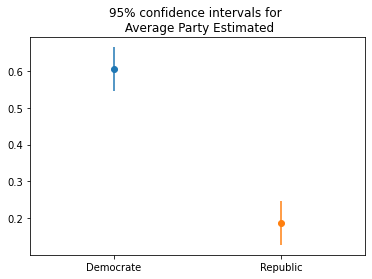

In [109]:
# plt.errorbar
plt.errorbar(x=0, y=CI3[1], yerr=(CI3[2]-CI3[1]), fmt='o')
plt.errorbar(x=1, y=CI4[1], yerr=(CI4[2]-CI4[1]), fmt='o')
plt.title('95% confidence intervals for \n Average Party Estimated')
plt.xticks(ticks=[0,1], labels=['Democrate', 'Republic'])
plt.xlim(-.5, 1.5)
plt.show()

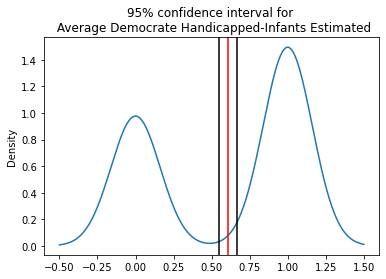

In [107]:
# plt.density
dem['handicapped-infants'].plot.density()
plt.axvline(CI3[0], color='black')
plt.axvline(CI3[1], color='red')
plt.axvline(CI3[2], color='black')
plt.title('95% confidence interval for \n Average Democrate Handicapped-Infants Estimated')
plt.show()

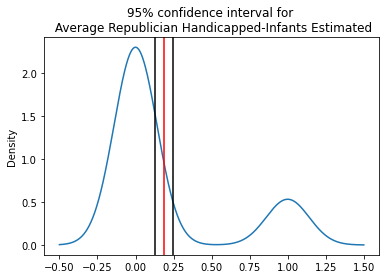

In [108]:
# plt.density
rep['handicapped-infants'].plot.density()
plt.axvline(CI4[0], color='black')
plt.axvline(CI4[1], color='red')
plt.axvline(CI4[2], color='black')
plt.title('95% confidence interval for \n Average Republician Handicapped-Infants Estimated')
plt.show()

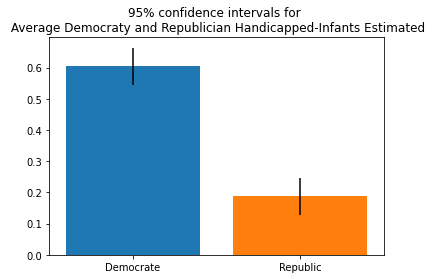

In [110]:
# plt.bar
plt.bar(x=0, height=CI3[1], yerr=(CI3[2]-CI3[1]))
plt.bar(x=1, height=CI4[1], yerr=(CI4[2]-CI4[1]))
plt.title('95% confidence intervals for \n Average Democraty and Republician Handicapped-Infants Estimated')
plt.xticks(ticks=[0,1], labels=['Democrate', 'Republic'])
plt.xlim(-.5, 1.5)
plt.show()